Encoder : 1 LSTM  
Decoder : 1 LSTM  
Epochs : 50  
Hidde layer : 4000  
Past : 40  
Future : 20  

In [76]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector,TimeDistributed, Dense, Input

            Robberies
Month                
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43


<Axes: xlabel='Month'>

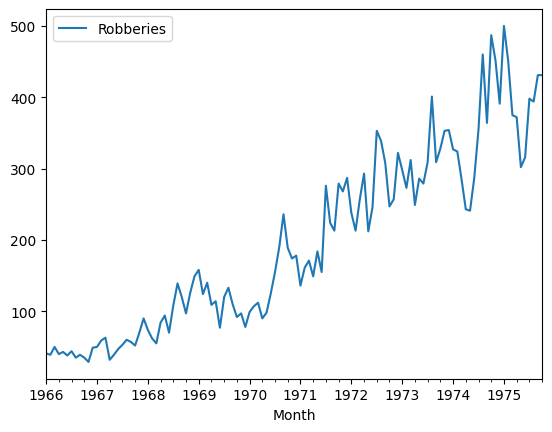

In [77]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
print(df.head())
df.plot()

In [78]:
max_value = max(df['Robberies'])
min_value = min(df['Robberies'])

def normalize_data(data):
    return (data - min_value) / (max_value - min_value)

def denormalize_data(data):
    return data * (max_value - min_value) + min_value

normalized_df = normalize_data(df['Robberies'])

n_features = 1
n_future = 20
n_past = 40

x = []
for i in range(len(normalized_df) - n_past + 1 - n_future):
    window = normalized_df.iloc[i:i+n_past].to_numpy().reshape(-1, 1)
    x.append(window)
x = np.array(x)

y = []
for i in range(n_past, len(normalized_df) - n_past + 1):
    window = normalized_df.iloc[i:i+n_future].to_numpy().reshape(-1, 1)
    y.append(window)
y = np.array(y)

train_size = 0.8
validation_size = 0.1
test_size = 0.1

indices = np.arange(min(len(x),len(y)))
np.random.shuffle(indices)
np.random.shuffle(indices)
np.random.shuffle(indices)
np.random.shuffle(indices)
train_index = int(train_size * len(indices))
val_index = int((train_size + validation_size) * len(indices))

train_indices = indices[:train_index]
val_indices = indices[train_index:val_index]
test_indices = indices[val_index:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

print("Number of samples in training set:", len(x_train))
print("Number of samples in validation set:", len(x_val))
print("Number of samples in test set:", len(x_test))

print(x_train.shape[0],x_train.shape[1],x_train.shape[2])
print(x_test.shape[0],x_test.shape[1],x_test.shape[2])
print(x_val.shape[0],x_val.shape[1],x_val.shape[2])

print(y_train.shape[0],y_train.shape[1],y_train.shape[2])
print(y_test.shape[0],y_test.shape[1],y_test.shape[2])
print(y_val.shape[0],y_val.shape[1],y_val.shape[2])

Number of samples in training set: 31
Number of samples in validation set: 4
Number of samples in test set: 4
31 40 1
4 40 1
4 40 1
31 20 1
4 20 1
4 20 1


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-03-18 10:31:14.010484: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.


2024-03-18 10:31:14.369974: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.
2024-03-18 10:31:14.391892: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.
2024-03-18 10:31:14.439950: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.
2024-03-18 10:31:40.172386: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 4000)           │    64,032,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_7 (RepeatVector)  │ (None, 20, 4000)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 20, 4000)       │   128,016,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 20, 1)          │         4,001 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 192,052,001 (732.62 MB)

 Trainable params: 192,052,001 (732.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - loss: 0.2036 - val_loss: 0.8983
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 1.6585 - val_loss: 0.1661
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.2793 - val_loss: 122.5879
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 87.0654 - val_loss: 97.2483
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 77.0938 - val_loss: 3.4455
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 4.8228 - val_loss: 77.3627
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 73.7134 - val_loss: 2.1416
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 2.3235 - val_loss: 10.8892
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - loss: 11.4791 - val_loss: 1.2082
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 1.3452 - val_loss: 2.4822
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 2.1313 - val_loss: 0.8118
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.6332 - val_loss:

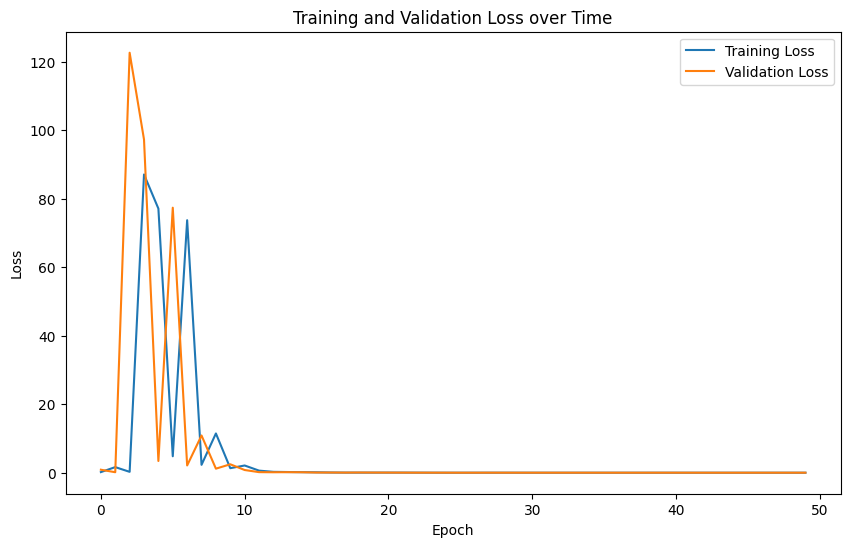

In [79]:
batch_size = x_train.shape[0]
epochs = 50
hidden_layer = 4000

model = Sequential()
model.add(LSTM(hidden_layer, activation='tanh', input_shape=(n_past, n_features)))
model.add(RepeatVector(n_future))
model.add(LSTM(hidden_layer, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Time')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


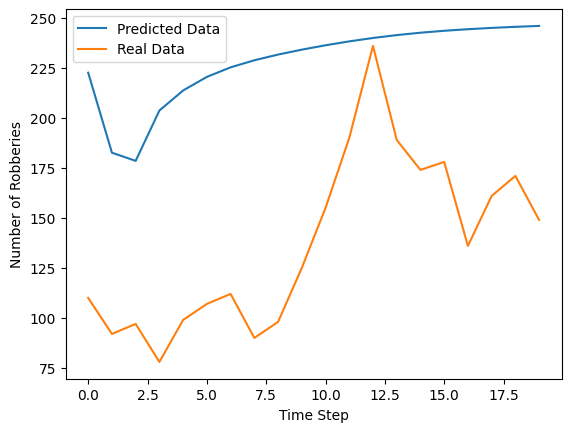

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


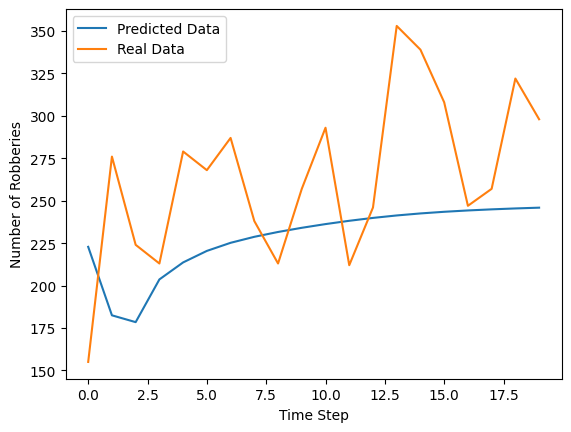

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


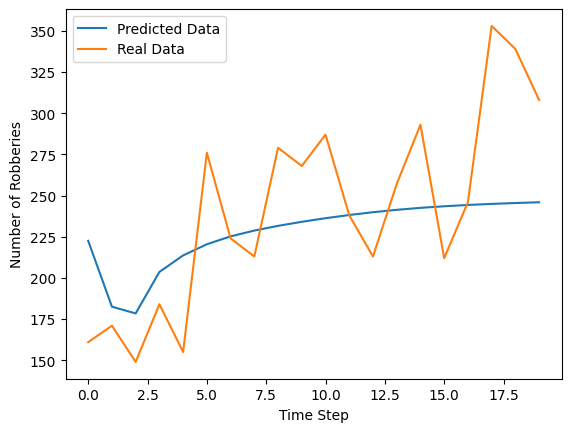

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


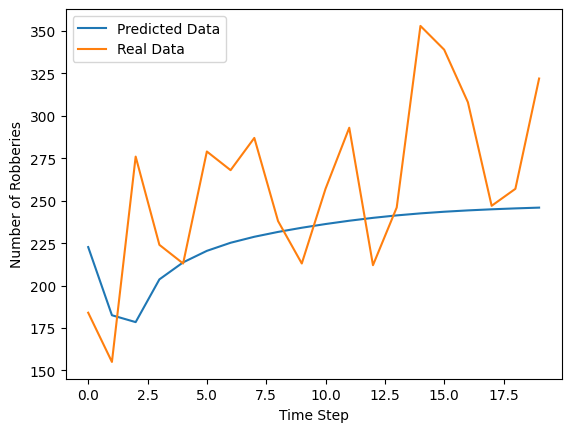

In [80]:
predictions = []
for i, x in enumerate(x_val):
    x = x.reshape(1,n_past,1)
    predicted = denormalize_data(model.predict(x)).flatten()
    predictions.append(predicted)
    real = denormalize_data(y_val[i].flatten())
    plt.plot(predicted, label='Predicted Data')
    plt.plot(real, label='Real Data')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.legend()
    plt.show()

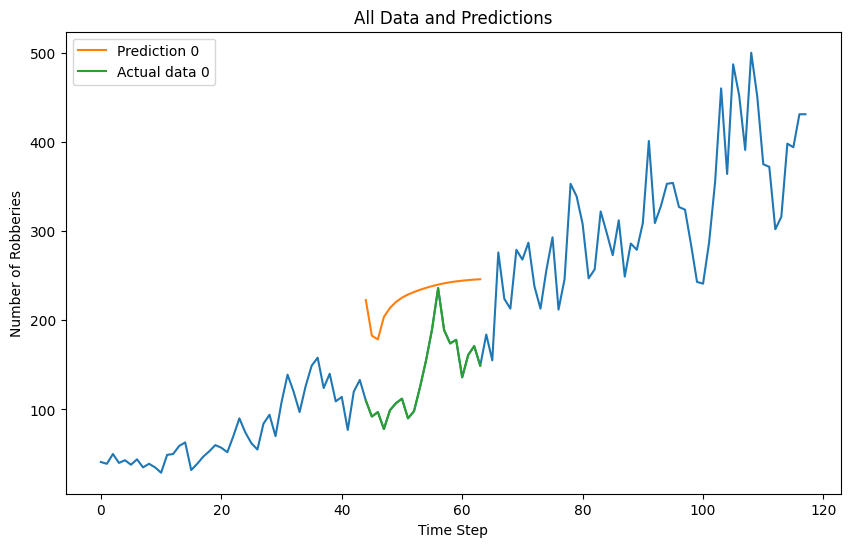

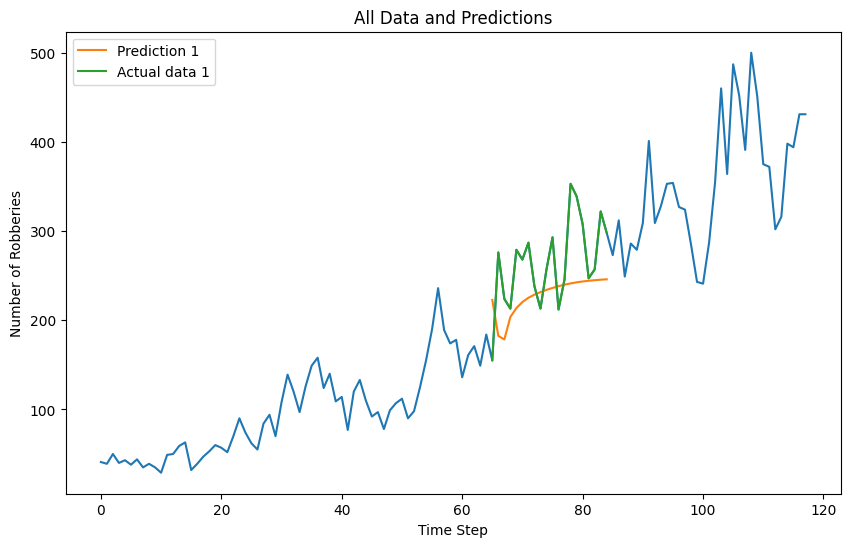

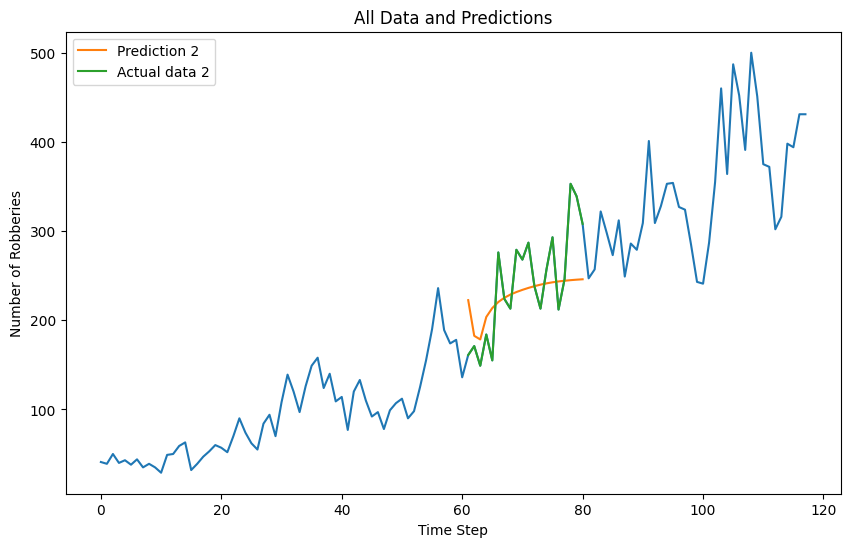

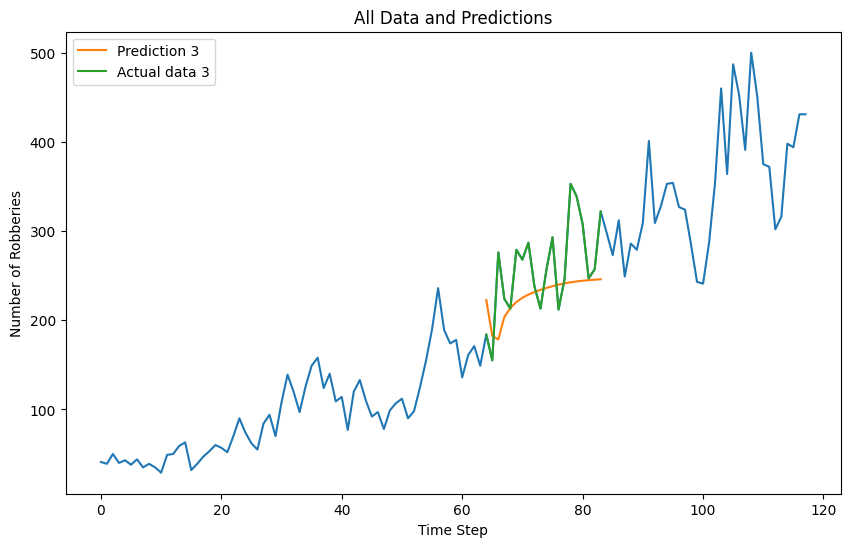

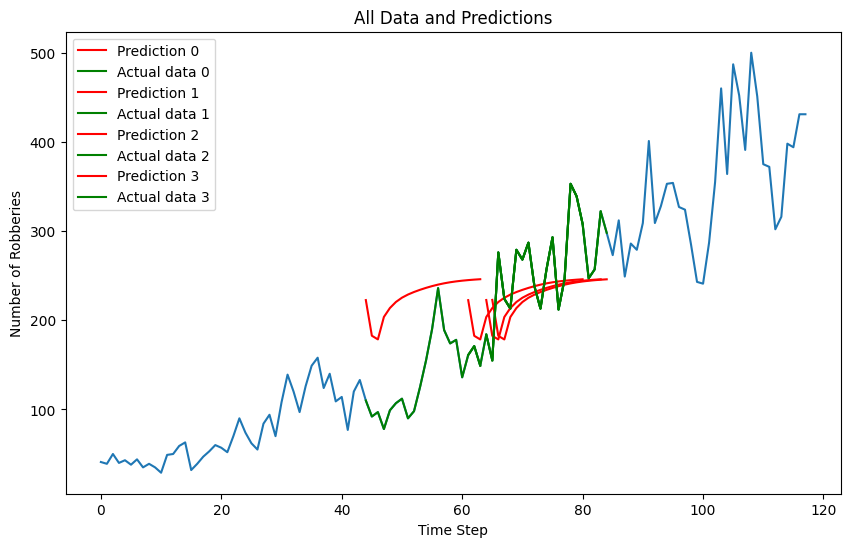

In [81]:
robberies_values = denormalize_data(normalize_data(df['Robberies'].values))
predicted_values = []



for i, p in enumerate(predictions):
    index = val_indices[i] + n_past
    x_values = [j for j in range(index,index+n_future)]
    plt.figure(figsize=(10, 6))
    plt.plot(robberies_values)
    plt.plot(x_values,p, label=f"Prediction {i}")
    plt.plot(x_values,denormalize_data(y_val[i].flatten()), label=f"Actual data {i}")
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.title('All Data and Predictions')
    plt.legend()
    plt.show()


plt.figure(figsize=(10, 6))
plt.plot(robberies_values)

for i, p in enumerate(predictions):
    index = val_indices[i] + n_past
    x_values = [j for j in range(index,index+n_future)]
    plt.plot(x_values,p, label=f"Prediction {i}", color="red")
    plt.plot(x_values,denormalize_data(y_val[i].flatten()), label=f"Actual data {i}", color="green")

plt.xlabel('Time Step')
plt.ylabel('Number of Robberies')
plt.title('All Data and Predictions')
plt.legend()
plt.show()